In [1]:
!pip install emoji

!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=bfa33131d47565f563e75e218c1d43a9210e80eaec51be3ee70426575b5d73cf
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji
2023-07-04 19:22:55.875061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 19:22:58.572945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 86.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spac

In [2]:
import pandas as pd
import numpy as np
import csv
import spacy
import re
import matplotlib.pyplot as plt
import emoji
from unicodedata import normalize
from tqdm import tqdm
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

def preprocessar_tweets(tweets):
    nlp = spacy.load('pt_core_news_sm')
    repetion_pattern = re.compile(r'(.)\1\1+')
    new_tweets = []
    with tqdm(total=len(tweets), colour='green', desc='Processando') as pbar:
      for tweet in tweets[1:]:
          tweet[0] = emoji.demojize(tweet[0], language='pt')
          tweet[0] = tweet[0].replace('_', ' ')
          tweet[0] = normalize('NFKD', tweet[0]).encode('ASCII', 'ignore').decode('ASCII')
          tweet[0] = repetion_pattern.sub(r'\1', tweet[0])
          tweet[0] = re.sub(r'@\w+', ' ', tweet[0])
          tweet[0] = re.sub(r'\s\s+', ' ', tweet[0])
          doc = nlp(tweet[0])
          tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT' and not t.is_stop and len(t.lemma_) > 1]
          new_tweet = ' '.join(tokens)
          tweet[0]=(tweet[0].strip())
          tweet[1]=int(tweet[1])
          tweet[2]=int(tweet[2])
          tweet[3]=tweet[3].replace(",", ".", 1)
          tweet[3]=int (float(tweet[3]))
          if(tweet[3]==-1):
            tweet[3]=10
          new_tweets.append(tweet)
          pbar.update(1)

    return new_tweets

def ler_csv(arquivo):
    matriz = []

    with open(arquivo, 'r') as csv_file:
        leitor = csv.reader(csv_file)

        for linha in leitor:
            matriz.append(linha)

    return matriz

# instagram_comments,     offensive_language,     offensiveness_levels,    hate_speech


In [5]:
matriz = ler_csv('/content/drive/MyDrive/5d/HateBR.csv')
print(matriz[2])
dataset=preprocessar_tweets(matriz)
#dataset= random.shuffle(dataset)

['Mais um lixo', '1', '1', '-1']


Processando: 100%|█████████▉| 7000/7001 [01:06<00:00, 105.91it/s]


X -> será o atribuido para os dados de texto

y -> será para os rotulos dos textos

In [6]:
X=np.array(dataset)
dataset[0]

['este lixo .', 1, 1, 10]

# Modificar o valor de "l" para definir o teste:
## 1 para testar se o comentario é ofencivo ou não
## 3 para testar se o comentario qual tipo de discurso de odio o comentario tem

In [7]:
X=np.array(dataset)[:,0]
y =  np.array(dataset)[:,[1]]


In [8]:
n_rows=2000
# Separar em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar em conjunto de treinamento e conjunto de validação
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

'''
X_train = dataset['train']['text']
X_validation = dataset['validation']['text']
X_test = dataset['test']['text']

y_train = dataset['train']['label']
y_validation = dataset['validation']['label']
y_test = dataset['test']['label']

if n_rows > 0:
  X_train = X_train[:n_rows]
  X_validation = X_validation[:n_rows]
  X_test = X_test[:n_rows]

  y_train = y_train[:n_rows]
  y_validation = y_validation[:n_rows]
  y_test = y_test[:n_rows]

print(f'\nTrain: {len(X_train)}')
print(f'Validation: {len(X_validation)}')
print(f'Test: {len(X_test)}')

print(f'\n\nLabels Distribution Train: {Counter(y_train)}')
print(f'\nLabels Distribution Validation: {Counter(y_validation)}')
print(f'\nLabels Distribution Test: {Counter(y_test)}')
'''

"\nX_train = dataset['train']['text']\nX_validation = dataset['validation']['text']\nX_test = dataset['test']['text']\n\ny_train = dataset['train']['label']\ny_validation = dataset['validation']['label']\ny_test = dataset['test']['label']\n\nif n_rows > 0:\n  X_train = X_train[:n_rows]\n  X_validation = X_validation[:n_rows]\n  X_test = X_test[:n_rows]\n\n  y_train = y_train[:n_rows]\n  y_validation = y_validation[:n_rows]\n  y_test = y_test[:n_rows]\n\nprint(f'\nTrain: {len(X_train)}')\nprint(f'Validation: {len(X_validation)}')\nprint(f'Test: {len(X_test)}')\n\nprint(f'\n\nLabels Distribution Train: {Counter(y_train)}')\nprint(f'\nLabels Distribution Validation: {Counter(y_validation)}')\nprint(f'\nLabels Distribution Test: {Counter(y_test)}')\n"

In [9]:
print(f'Raw Tweet Train: {X_train[0]}')
print(f'\nRaw Tweet Validation: {X_validation[0]}')
print(f'\nRaw Tweet Test: {X_test[0]}')

Raw Tweet Train: Esse nogento

Raw Tweet Validation: Essa e a face do brasileiro bolsonarista e racista e no gosta de dividir nada com ninguem. .onde anda a Igualdade? ??

Raw Tweet Test: Lula Livre


In [10]:
vectorizer_option = 1

if vectorizer_option == 1:
  vectorizer = CountVectorizer(binary=True, max_features=None, ngram_range=(1, 1))
elif vectorizer_option == 2:
  vectorizer = CountVectorizer(binary=False, max_features=None, ngram_range=(1, 1))
else:
  vectorizer = TfidfVectorizer(max_features=None, ngram_range=(1, 1))

vectorizer.fit(X_train)

print(f'Vocabulary: {len(vectorizer.vocabulary_)}')

X_train = vectorizer.transform(X_train).toarray()
X_validation = vectorizer.transform(X_validation).toarray()
X_test = vectorizer.transform(X_test).toarray()

print(f'\nVectorized Tweet Train: {X_train[0]}')
print(f'\nVectorized Tweet Validation: {X_validation[0]}')
print(f'\nVectorized Tweet Test: {X_test[0]}')

Vocabulary: 7245

Vectorized Tweet Train: [0 0 0 ... 0 0 0]

Vectorized Tweet Validation: [0 0 0 ... 0 0 0]

Vectorized Tweet Test: [0 0 0 ... 0 0 0]


In [11]:
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced')
}


Evaluation


  Classifier: Logistic Regression



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       689
           1       0.88      0.82      0.85       711

    accuracy                           0.85      1400
   macro avg       0.85      0.85      0.85      1400
weighted avg       0.85      0.85      0.85      1400



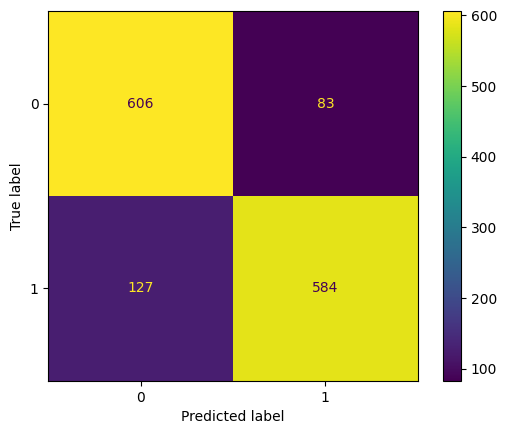


  Classifier: Multinomial NB



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       689
           1       0.83      0.88      0.85       711

    accuracy                           0.85      1400
   macro avg       0.85      0.85      0.85      1400
weighted avg       0.85      0.85      0.85      1400



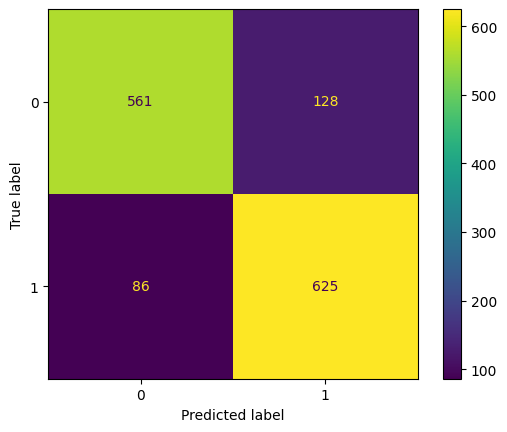


  Classifier: KNN



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.75      0.78      0.76       689
           1       0.78      0.75      0.76       711

    accuracy                           0.76      1400
   macro avg       0.76      0.76      0.76      1400
weighted avg       0.76      0.76      0.76      1400



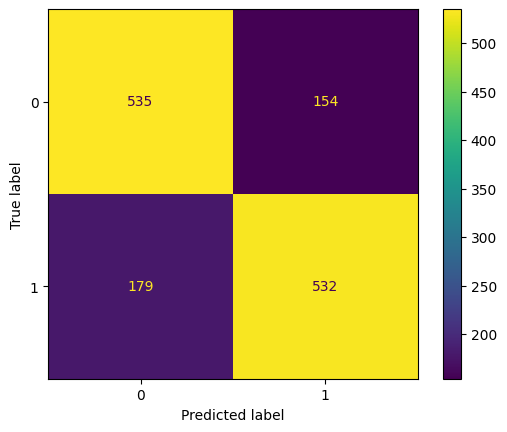


  Classifier: SVC



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       689
           1       0.83      0.83      0.83       711

    accuracy                           0.82      1400
   macro avg       0.82      0.82      0.82      1400
weighted avg       0.82      0.82      0.82      1400



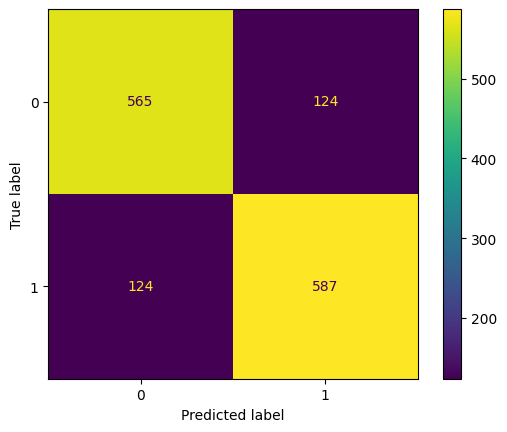


  Classifier: Decision Tree

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       689
           1       0.77      0.77      0.77       711

    accuracy                           0.77      1400
   macro avg       0.77      0.77      0.77      1400
weighted avg       0.77      0.77      0.77      1400



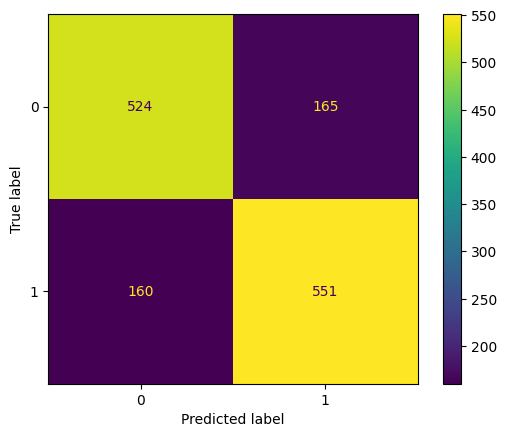


  Classifier: Random Forest



<ipython-input-12-508f30e842c5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.79      0.85      0.82       689
           1       0.85      0.78      0.81       711

    accuracy                           0.82      1400
   macro avg       0.82      0.82      0.82      1400
weighted avg       0.82      0.82      0.82      1400



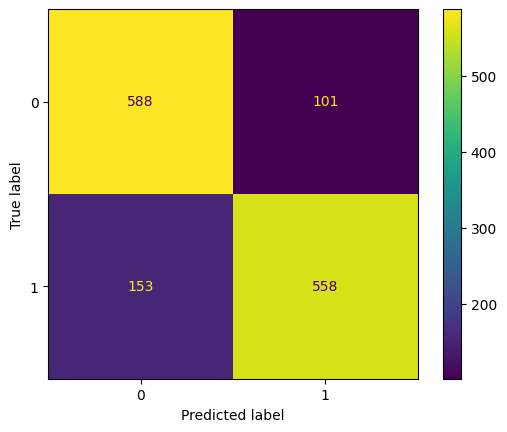

In [12]:
print('\nEvaluation\n')

for clf_name, clf in classifiers.items():

  print(f'\n  Classifier: {clf_name}\n')

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  report = classification_report(y_test, y_pred, zero_division=0)

  print(report)

  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

  plt.show()